#Demonstration - Customer Segmentation using K-Means, Hierarchical, and GMM

#Scenario
A retail company is looking to better understand its customer base to personalize marketing strategies and improve customer engagement. Currently, all customers are treated the same, which is inefficient and costly.

##To solve this, the company wants to segment its customers into distinct groups based on:

- How often they purchase (Purchase_Frequency)

- How much they spend (Spend)

- How frequently they visit (Monthly_Visits)

- How loyal they are (Loyalty_Score)

###Goal:
Apply and compare different clustering techniques (K-Means, Hierarchical, and Gaussian Mixture Models) to group customers and determine which method best captures meaningful customer segments.

##Step 1: Import Required Libraries

- We need tools for data handling, scaling, clustering models, evaluation metrics, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

##Step 2: Load the Dataset

- We’re using a synthetic dataset representing retail customers. This simulates the business environment for our clustering exercise.

In [2]:
data = pd.read_csv("customer_data.csv")
data.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score
0,1,5.993428,55.789308,5,8.485273
1,2,4.723471,44.433809,2,3.457637
2,3,6.295377,66.690239,5,5.662709
3,4,8.046060,83.512448,3,3.688530
4,5,4.531693,45.212425,6,9.466113


##Step 3: Data Preprocessing

- Clustering algorithms are distance-based. Scaling ensures each feature contributes equally, avoiding bias toward higher-valued features like Spend.

In [3]:
features = ['Purchase_Frequency', 'Spend', 'Monthly_Visits', 'Loyalty_Score']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Step 4: Find Optimal Clusters using Elbow Method

We use the Elbow Method to identify the optimal number of clusters (K) for K-Means. This helps avoid over- or under-segmentation.

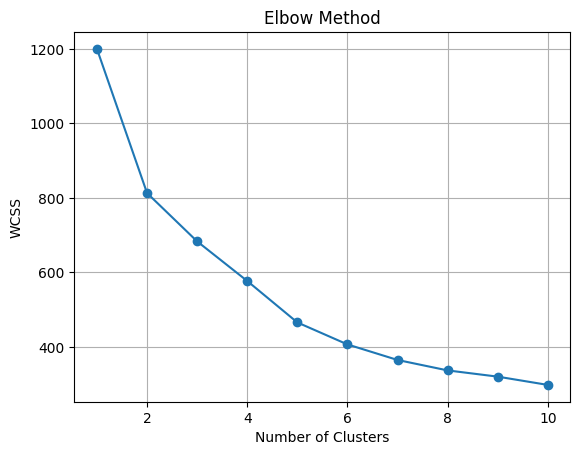

In [4]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

##Step 5: Apply K-Means Clustering

- K-Means is simple and effective for large datasets. It quickly groups customers into distinct clusters based on their behavior.

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = kmeans_labels

##Step 6: Hierarchical Clustering + Dendrogram

- Hierarchical clustering allows us to visualize how clusters form through a dendrogram. It’s useful when we want to observe nested clusters.

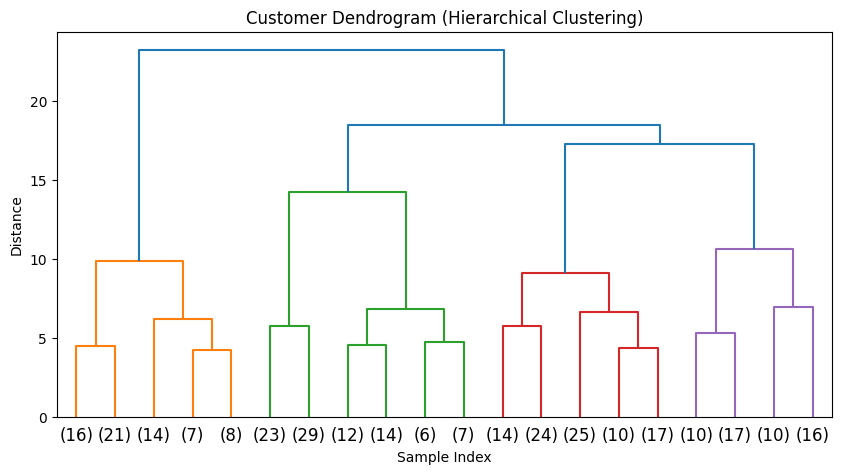

In [6]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Customer Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [7]:
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(X_scaled)
data['Hierarchical_Cluster'] = agg_labels

##Step 7: Apply Gaussian Mixture Models (GMM)

- GMM assumes data comes from multiple Gaussian distributions. It's better for capturing overlapping clusters, unlike K-Means which assigns hard boundaries.



In [8]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
data['GMM_Cluster'] = gmm_labels

##Step 8: Visualize Clusters

- We visualize K-Means clusters using two important features. This helps interpret what each segment looks like.

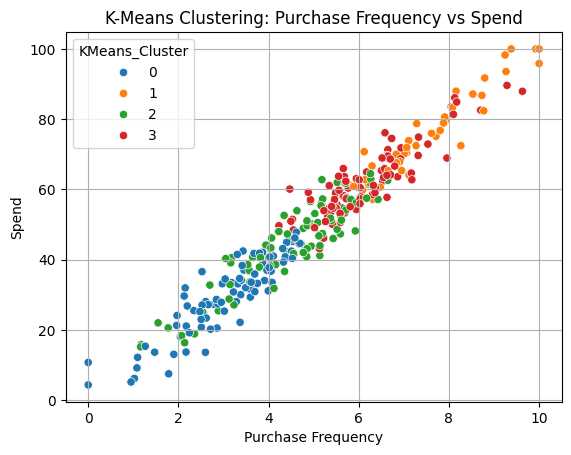

In [9]:
sns.scatterplot(x='Purchase_Frequency', y='Spend', hue='KMeans_Cluster', data=data, palette='tab10')
plt.title('K-Means Clustering: Purchase Frequency vs Spend')
plt.xlabel('Purchase Frequency')
plt.ylabel('Spend')
plt.grid(True)
plt.show()

##Step 9: Evaluate Clustering Results

- To determine which algorithm performs best:

  - Silhouette Score: Higher = better-separated clusters

  - Davies-Bouldin Score: Lower = better clustering

In [10]:
print("Silhouette Scores:")
print("KMeans:", silhouette_score(X_scaled, kmeans_labels))
print("Hierarchical:", silhouette_score(X_scaled, agg_labels))
print("GMM:", silhouette_score(X_scaled, gmm_labels))

print("\nDavies-Bouldin Scores:")
print("KMeans:", davies_bouldin_score(X_scaled, kmeans_labels))
print("Hierarchical:", davies_bouldin_score(X_scaled, agg_labels))
print("GMM:", davies_bouldin_score(X_scaled, gmm_labels))

Silhouette Scores:
KMeans: 0.24496069519902577
Hierarchical: 0.2164449289918176
GMM: 0.14374813269207318

Davies-Bouldin Scores:
KMeans: 1.2945080284475377
Hierarchical: 1.3173511701168843
GMM: 1.7866545828412908


##Step 10: Compare Methods (Create Summary Table)

- This side-by-side comparison helps the business choose the best clustering approach based on performance metrics.

In [11]:
comparison = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical', 'GMM'],
    'Silhouette Score': [
        silhouette_score(X_scaled, kmeans_labels),
        silhouette_score(X_scaled, agg_labels),
        silhouette_score(X_scaled, gmm_labels)
    ],
    'Davies-Bouldin Score': [
        davies_bouldin_score(X_scaled, kmeans_labels),
        davies_bouldin_score(X_scaled, agg_labels),
        davies_bouldin_score(X_scaled, gmm_labels)
    ]
})
comparison

,Method,Silhouette Score,Davies-Bouldin Score
0,K-Means,0.244961,1.294508
1,Hierarchical,0.216445,1.317351
2,GMM,0.143748,1.786655


##Final Interpretation & Business Insight

- K-Means performed best in both Silhouette and Davies-Bouldin scores.

- Visual clusters are also more distinct in K-Means.

- Customer segments found can now be labeled:

  - High spenders but low frequency

  - Frequent shoppers with high loyalty

  - Low-value customers

  - Moderate customers

The marketing team can now tailor campaigns per segment, offer loyalty perks, upsell to high spenders, or re-engage low-value groups.